# **Question 2:  Naive Bayes**

## Importing necessary libraries

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


### Removing warnings

In [2]:
import warnings

# To ignore all warnings:
warnings.filterwarnings("ignore")

# To ignore a specific type of warning (e.g., DeprecationWarning):
warnings.filterwarnings("ignore", category=DeprecationWarning)

## **Part A: Probability:**


In [3]:
def Experiment(k1, num_rolls1, num_trials1):
    # Set the number of trials and the number of dice rolls per trial
    k = k1
    num_trials = num_trials1
    num_rolls = num_rolls1
    
    results = []
    weight=[]
    weight.append(1 / (2 ** (k - 1)))
    for i in range(2, k + 1):
        weight.append(1 / (2 ** (i - 1)))
    
    print("Probabilities: ", weight)
    random.seed(50)
    for _ in range(num_trials):
        trial_sum = sum(random.choices(range(1, k + 1), k=num_rolls, weights=weight))
        results.append(trial_sum)
    
    # Plot a frequency distribution histogram
    plt.hist(results, bins=range(num_rolls, k * num_rolls + 2), align='left', rwidth=0.8)
    plt.title('Frequency Distribution (k={}, Rolls={})'.format(k, num_rolls))
    plt.xlabel('Sum of Upward Face Values')
    plt.ylabel('Frequency')
    plt.show()
    
    # Calculate and print the five-number summary
    min_val = np.min(results)
    q1 = np.percentile(results, 25)
    median = np.percentile(results, 50)
    q3 = np.percentile(results, 75)
    max_val = np.max(results)

    print("\nFive-number  summary  of  the  distribution.")
    print("Min: %d" % min_val)
    print("Q1: %d" % q1)
    print("Median: %d" % median)
    print("Q3: %d" % q3)
    print("Max: %d" % max_val)
    
    # Theoretical Expected Value
    expected_value = 0
    
    for i in range(1, k+1):
        #print(i, weight[i-1])
        expected_value+=i*weight[i-1]
        
    print("\nSimulated Expected Value: %.2f" % (np.mean(results)))
    print("Theoretical Expected Value: %.2f" % (expected_value*num_rolls))

### 1.  Consider **k = 4** and randomly roll the die **4 times**
1.   calculate the sum of the upward facevalue.  
2.   Repeat this **task 1000 times**
3.   **plot a frequency distribution histogram**.  
4.   Print the **five-number summary** of the distribution.   
5.   Showing that the **theoretical Expected sum** of the event is close to the **actual sum** we got in the Python program simulation.




Probabilities:  [0.125, 0.5, 0.25, 0.125]


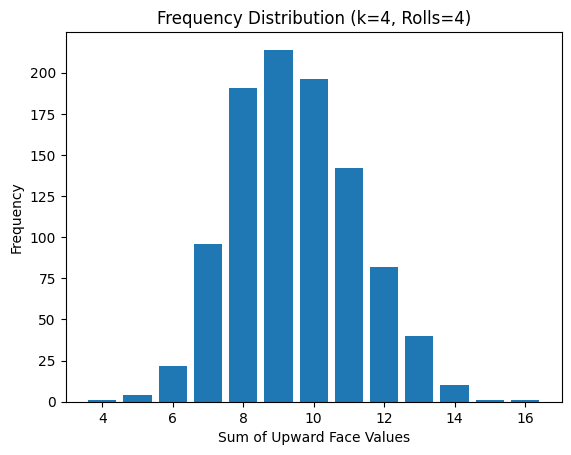


Five-number  summary  of  the  distribution.
Min: 4
Q1: 8
Median: 9
Q3: 11
Max: 16

Simulated Expected Value: 9.48
Theoretical Expected Value: 9.50


In [4]:
Experiment(4, 4, 1000)

### 2.  Consider **k = 4** and randomly roll the die **8 times**
1.   calculate the sum of the upward facevalue.  
2.   Repeat this **task 1000 times**
3.   **plot a frequency distribution histogram**.  
4.   Print the **five-number summary** of the distribution.   
5.   Showing that the **theoretical Expected sum** of the event is close to the **actual sum** we got in the Python program simulation.




Probabilities:  [0.125, 0.5, 0.25, 0.125]


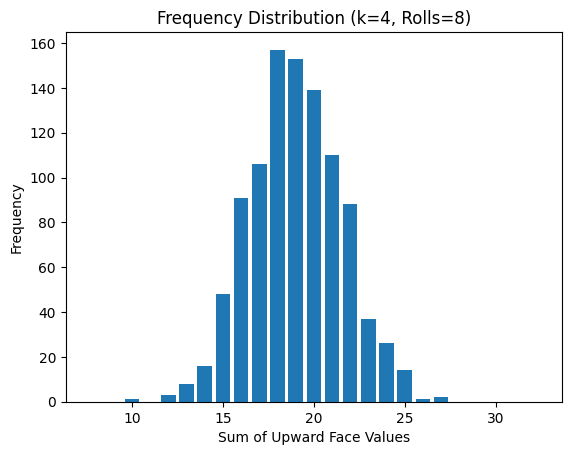


Five-number  summary  of  the  distribution.
Min: 10
Q1: 17
Median: 19
Q3: 21
Max: 27

Simulated Expected Value: 19.02
Theoretical Expected Value: 19.00


In [5]:
Experiment(4, 8, 1000)

### 3.  Consider **k = 16** and randomly roll the die **4 times**
1.   calculate the sum of the upward facevalue.  
2.   Repeat this **task 1000 times**
3.   **plot a frequency distribution histogram**.  
4.   Print the **five-number summary** of the distribution.   
5.   Showing that the **theoretical Expected sum** of the event is close to the **actual sum** we got in the Python program simulation.




Probabilities:  [3.0517578125e-05, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05]


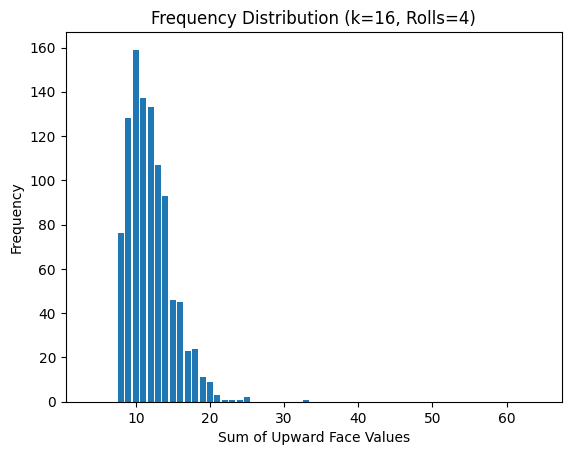


Five-number  summary  of  the  distribution.
Min: 8
Q1: 10
Median: 11
Q3: 14
Max: 33

Simulated Expected Value: 11.98
Theoretical Expected Value: 12.00


In [6]:
Experiment(16, 4, 1000)

## **Part B: Implementation of Naive Bayes (From Scratch)**

### 1.  **Getting Dataset :**

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

### 2.  **Loading Dataset**: Load the data with a 70 : 15 : 15 split for train, validation, and testing

In [8]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the sets

print("Train set size: {:.0f}%".format(X_train.shape[0]*100/X.shape[0]))
print("Validation set size: {:.0f}%".format(X_valid.shape[0]*100/X.shape[0]))
print("Test set size: {:.0f}%".format(X_test.shape[0]*100/X.shape[0]))

Train set size: 70%
Validation set size: 15%
Test set size: 15%


In [9]:
# Count null values in X
null_values_in_X = X.isnull().sum().sum()

# Count null values in y
null_values_in_y = y.isnull().sum().sum()

# Print the counts
print("Number of null values in X:", null_values_in_X)
print("Number of null values in y:", null_values_in_y)

Number of null values in X: 0
Number of null values in y: 0


### 2.  **Plot Distribution:** Choose some 5 columns from the dataset and plot the probability distribution. 

word_freq_make


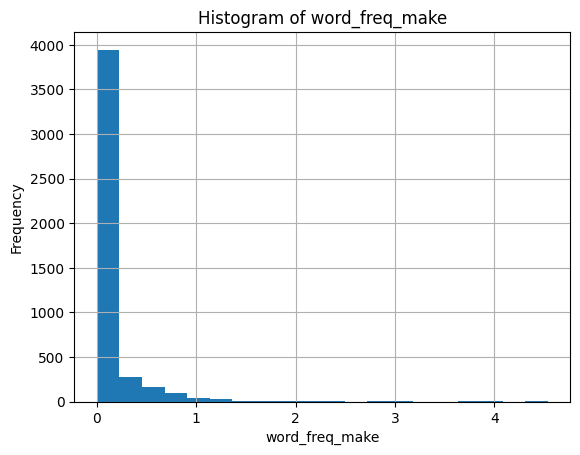

In [10]:
col = X.columns
column = col[0]
print(column)
X[col[0]].hist(bins=20)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

word_freq_address


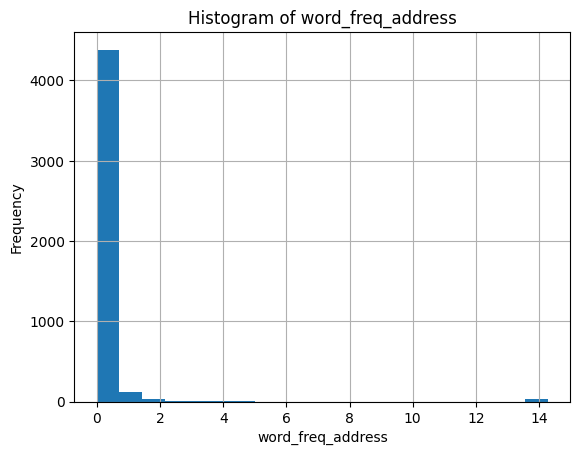

In [11]:
column = col[1]
print(column)
X[col[1]].hist(bins=20)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

word_freq_all


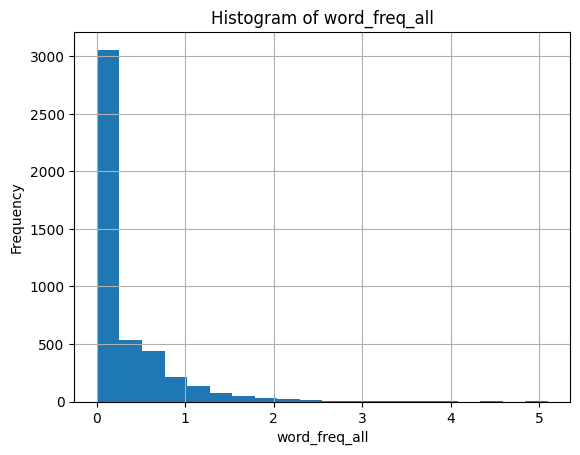

In [12]:
column = col[2]
print(column)
X[col[2]].hist(bins=20)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

word_freq_3d


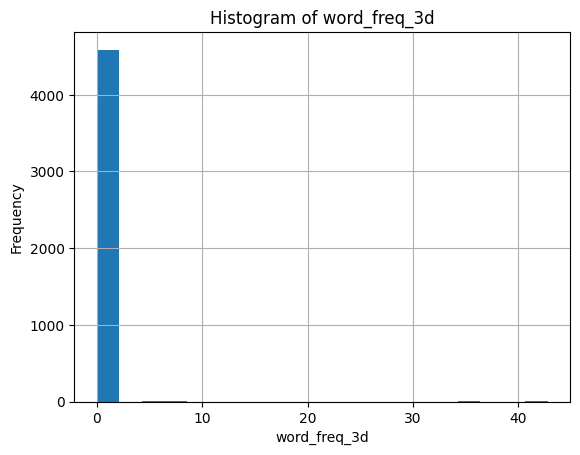

In [13]:
column = col[3]
print(column)
X[col[3]].hist(bins=20)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

word_freq_our


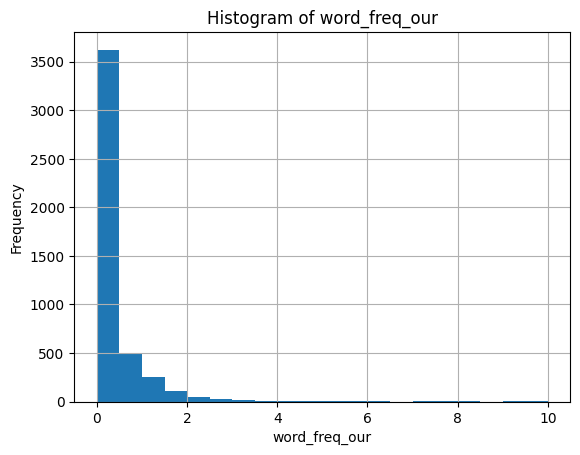

In [14]:
column = col[4]
print(column)
X[col[4]].hist(bins=20)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [15]:
print(y_train)

      Class
132       1
1358      1
2569      0
2842      0
4536      0
...     ...
1861      0
2366      0
266       1
277       1
3114      0

[3220 rows x 1 columns]


### 4.   **Priors:** Calculate and print the priors of classes.
### 5.   **Train Model:** Implement the Naive Bayes algorithm from scratch (preferably object-orientedimplementation with fit and predict function, this will make your later questions easier tohandle). Also, mention the total number of parameters needed to be stored for the model.
### 6.   **Prediction and Evaluation:** Implement functions to generate predictions on the test setand calculate accuracy, precision, recall, and F1-score for the Naive Bayes model.

4.   **Priors:** Calculate and print the priors of classes.

In [16]:
# Laplace smoothing parameter (you can adjust this value)
alpha = 1.0

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.class_priors = self.calculate_class_priors()
        self.means, self.variances = self.calculate_class_stats()

    def calculate_class_priors(self):
        class_priors = {}
        total_samples = len(self.y)
        for c in self.classes:
            class_priors[c] = (len(self.y[self.y == c]) + alpha) / (total_samples + alpha * len(self.classes))
        return class_priors

    def calculate_class_stats(self):
        means = {}
        variances = {}
        for c in self.classes:
            class_samples = self.X[self.y == c]
            means[c] = np.mean(class_samples, axis=0)
            variances[c] = np.var(class_samples, axis=0)
        return means, variances

    def calculate_likelihood(self, x, mean, variance):
        exponent = np.exp(-(x - mean) ** 2 / (2 * variance))
        return (1 / (np.sqrt(2 * np.pi * variance))) * exponent

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                x = x.astype(np.float64)
                likelihoods = np.log(self.calculate_likelihood(x, self.means[c], self.variances[c]))
                posteriors[c] = np.sum(likelihoods) + prior
            predictions.append(max(posteriors, key=posteriors.get))
        return predictions

    def print_class_priors(self):
        print("Class Priors:")
        for c in self.classes:
            print(f"Class {c}: {self.class_priors[c]}")

    def print_class_priors_and_attributes(self):
        print("Class Priors:")
        for c in self.classes:
            print(f"Class {c}: {self.class_priors[c]}")
        print("\nClass-Specific Means and Variances (Parameters):")
        for c in self.classes:
            print(f"Class {c}:")
            print("Means:", self.means[c])
            print("Variances:", self.variances[c])

    def total_parameters(self):
        num_params = len(self.classes)  # For class priors
        for c in self.classes:
            num_params += len(self.means[c]) + len(self.variances[c])  # For means and variances
        return num_params




X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Concatenate feature data and target labels into a single DataFrame
data = pd.concat([X_train_df, y_train_df], axis=1)

# Convert the combined DataFrame to a NumPy array
data_array = data.to_numpy()

# Split the data into features (X_train) and labels (y_train)
X_train_final = data_array[:, :-1]  # All columns except the last one are features
y_train_final = data_array[:, -1]  # The last column is the target variable


X_valid_df = pd.DataFrame(X_valid)
y_valid_df = pd.DataFrame(y_valid)

# Concatenate feature data and target labels into a single DataFrame
data = pd.concat([X_valid_df, y_valid_df], axis=1)

# Convert the combined DataFrame to a NumPy array
data_array = data.to_numpy()

# Split the data into features (X_train) and labels (y_train)
X_valid_final = data_array[:, :-1]  # All columns except the last one are features
y_valid_final = data_array[:, -1]

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNaiveBayes()
nb_classifier.fit(X_train_final, y_train_final)

# Print the class priors
nb_classifier.print_class_priors()

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# Concatenate feature data and target labels into a single DataFrame
data = pd.concat([X_test_df, y_test_df], axis=1)

# Convert the combined DataFrame to a NumPy array
data_array = data.to_numpy()

# Split the data into features (X_train) and labels (y_train)
X_test_final = data_array[:, :-1]  # All columns except the last one are features
y_test_final = data_array[:, -1]

# Evaluate the model on the test set
y_pred = nb_classifier.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred)

# Calculate precision
precision = precision_score(y_test_final, y_pred)

# Calculate recall
recall = recall_score(y_test_final, y_pred)

# Calculate F1-score
f1 = f1_score(y_test_final, y_pred)

Class Priors:
Class 0.0: 0.6058348851644941
Class 1.0: 0.39416511483550587


5.   **Train Model:** Implement the Naive Bayes algorithm from scratch (preferably object-orientedimplementation with fit and predict function, this will make your later questions easier tohandle). Also, mention the total number of parameters needed to be stored for the model.

In [17]:
nb_classifier.print_class_priors_and_attributes()
# Calculate the total number of parameters needed to be stored for the model
num_parameters = nb_classifier.total_parameters()
print("\nTotal Number of Parameters:", num_parameters)

Class Priors:
Class 0.0: 0.6058348851644941
Class 1.0: 0.39416511483550587

Class-Specific Means and Variances (Parameters):
Class 0.0:
Means: [7.43618657e-02 2.54623270e-01 1.93885187e-01 1.06611994e-03
 1.73772424e-01 4.25627883e-02 1.07585853e-02 3.90415172e-02
 3.82214249e-02 1.44869298e-01 2.48744234e-02 5.45376730e-01
 6.28856996e-02 5.37365454e-02 6.75550999e-03 8.12506407e-02
 4.76576115e-02 1.04864172e-01 1.26810354e+00 7.27319323e-03
 4.34848795e-01 5.23065095e-02 7.40133265e-03 2.10917478e-02
 9.11599180e-01 4.49989749e-01 1.25886725e+00 2.15612506e-01
 1.68836494e-01 1.60194772e-01 1.10235777e-01 8.01742696e-02
 1.54941056e-01 8.03434136e-02 1.86371092e-01 1.47447463e-01
 2.00650948e-01 1.78728857e-02 1.10896976e-01 8.39876986e-02
 6.05176832e-02 2.36232701e-01 6.80830343e-02 1.25633009e-01
 4.25135828e-01 2.69354177e-01 7.50896976e-03 5.35366479e-02
 5.19538698e-02 1.61447975e-01 2.32147617e-02 1.15513583e-01
 1.16919528e-02 1.78933880e-02 2.29566479e+00 1.74249103e+01
 1.

6.   **Prediction and Evaluation:** Implement functions to generate predictions on the test setand calculate accuracy, precision, recall, and F1-score for the Naive Bayes model.

In [18]:
print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print()


Accuracy: 0.82
Precision: 0.69
Recall: 0.97
F1 Score: 0.81



### 7.    **Log Transformation:** Apply log transformation to all the columns of the dataset. Then again training the Naive Bayes Classifier  and do the evaluations the same as earlier. (Note:Train/Test splits remain the same)

In [19]:
def log_transform(X):
    return np.log1p(X)
X_train_log_transformed = log_transform(X_train_final)
X_test_log_transformed = log_transform(X_test_final)
X_valid_log_transformed = log_transform(X_valid_final)
print(X_train_log_transformed, X_train_final)

[[0.         0.         0.75141609 ... 1.21194097 2.99573227 4.97673374]
 [0.27763174 0.         0.49469624 ... 1.5288784  4.15888308 5.7651911 ]
 [0.         0.         0.         ... 0.88418068 2.19722458 4.52178858]
 ...
 [0.         0.         0.         ... 1.90016534 3.68887945 4.52178858]
 [0.         0.45107562 0.45107562 ... 2.84589727 4.99721227 5.9242558 ]
 [0.         0.         0.         ... 1.25276297 2.77258872 4.18965474]] [[0.0000e+00 0.0000e+00 1.1200e+00 ... 2.3600e+00 1.9000e+01 1.4400e+02]
 [3.2000e-01 0.0000e+00 6.4000e-01 ... 3.6130e+00 6.3000e+01 3.1800e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.4210e+00 8.0000e+00 9.1000e+01]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 5.6870e+00 3.9000e+01 9.1000e+01]
 [0.0000e+00 5.7000e-01 5.7000e-01 ... 1.6217e+01 1.4700e+02 3.7300e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.5000e+00 1.5000e+01 6.5000e+01]]


In [20]:
# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNaiveBayes()
nb_classifier.fit(X_train_log_transformed, y_train_final)

# Print the class priors
nb_classifier.print_class_priors()

# Evaluate the model on the test set
y_pred = nb_classifier.predict(X_test_log_transformed)

accuracy = accuracy_score(y_test_final, y_pred)

# Calculate precision
precision = precision_score(y_test_final, y_pred)

# Calculate recall
recall = recall_score(y_test_final, y_pred)

# Calculate F1-score
f1 = f1_score(y_test_final, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print()
nb_classifier.print_class_priors_and_attributes()

# Calculate the total number of parameters needed to be stored for the model
num_parameters = nb_classifier.total_parameters()
print("\nTotal Number of Parameters:", num_parameters)


Class Priors:
Class 0.0: 0.6058348851644941
Class 1.0: 0.39416511483550587

Accuracy: 0.84
Precision: 0.71
Recall: 0.97
F1 Score: 0.82

Class Priors:
Class 0.0: 0.6058348851644941
Class 1.0: 0.39416511483550587

Class-Specific Means and Variances (Parameters):
Class 0.0:
Means: [5.14142096e-02 7.35123602e-02 1.27531844e-01 8.48728406e-04
 1.08781303e-01 3.09101336e-02 7.10666350e-03 2.63718515e-02
 2.72110198e-02 9.16962009e-02 1.74377849e-02 3.09423516e-01
 4.40938823e-02 2.86680274e-02 4.82454027e-03 4.15234335e-02
 3.46422208e-02 6.53761500e-02 5.87281656e-01 5.02003411e-03
 2.40755601e-01 1.42250411e-02 5.82291259e-03 1.05553076e-02
 3.82330615e-01 2.28687657e-01 3.25531567e-01 1.19121698e-01
 8.49654012e-02 9.38378493e-02 6.21493896e-02 4.53311428e-02
 8.07876259e-02 4.54490698e-02 1.04306076e-01 8.99362105e-02
 1.33364765e-01 8.72808249e-03 6.72445517e-02 4.79134291e-02
 3.28230017e-02 1.06679241e-01 4.72054440e-02 6.50507763e-02
 2.17174368e-01 1.24505422e-01 5.20836099e-03 3.00

### 8.   **Discuss:** Changes in the result is that the result improved for all accuracy, precision, recall and f1-score.

## **Part C: Implemention of Naive Bayes (sklearn)**

### 1.   **Train the model:** Import GaussianNB from sklearn.naivebayes. Train the model with the ***actually loaded** dataset and again after **log transformation**.

In [21]:
# Train the model with the original dataset
nb_original = GaussianNB()
nb_original.fit(X_train_final, y_train_final)

# Train the model with the log-transformed dataset
nb_log_transformed = GaussianNB()
nb_log_transformed.fit(X_train_log_transformed, y_train_final)

GaussianNB()

### 2.   **High precision:**
1. Drawing a ROC curve for two models we got previously.  
2. As we understand the importance of emails, **we don’t want not spam mail classified as spam (However very littleerror is acceptable)**.
3. So **Best model has High Precision or LOW FPR value**
4. Choosing one best model from the ROC curve

Precision (Original Data): 0.70
Precision (Log Transformed Data): 0.71

The best model is the Log-Transformed model
Based on a LOW FPR and HIGH PRECISION at TPR = 0.950
With AUC as 0.941 and Precsion as 0.713.



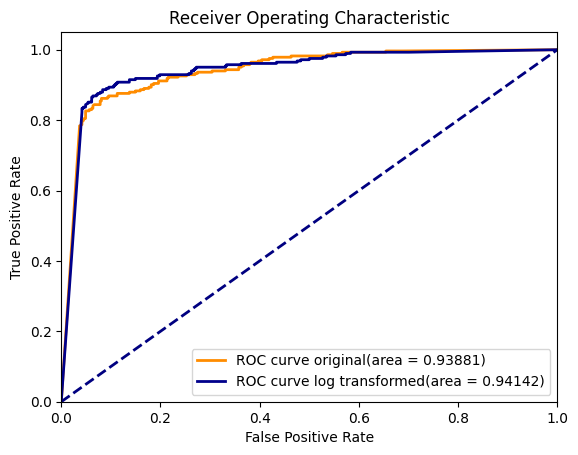

In [22]:
# Predict probabilities for the original and log-transformed models
y_scores_original = nb_original.predict_proba(X_valid_final)
y_scores_log_transformed = nb_log_transformed.predict_proba(X_valid_log_transformed)

y_pred_original = nb_original.predict(X_test_final)

# Calculate accuracy for the original model
accuracy_original = accuracy_score(y_test_final, y_pred_original)

# Calculate precision for the original model
precision_original = precision_score(y_test_final, y_pred_original)

# Calculate recall for the original model
recall_original = recall_score(y_test_final, y_pred_original)

# Calculate F1-score for the original model
f1_original = f1_score(y_test_final, y_pred_original)

print("Precision (Original Data): {:.2f}".format(precision_original))


y_pred_log_transformed = nb_log_transformed.predict(X_test_log_transformed)

# Calculate accuracy for the log-transformed model
accuracy_log_transformed = accuracy_score(y_test_final, y_pred_log_transformed)

# Calculate precision for the log-transformed model
precision_log_transformed = precision_score(y_test_final, y_pred_log_transformed)

# Calculate recall for the log-transformed model
recall_log_transformed = recall_score(y_test_final, y_pred_log_transformed)

# Calculate F1-score for the log-transformed model
f1_log_transformed = f1_score(y_test_final, y_pred_log_transformed)

print("Precision (Log Transformed Data): {:.2f}\n".format(precision_log_transformed))



# Compute ROC curve and AUC for the original model
fpr_original, tpr_original, _ = roc_curve(y_valid, y_scores_original[:, 1])
roc_auc_original = auc(fpr_original, tpr_original)

# Compute ROC curve and AUC for the log-transformed model
fpr_log_transformed, tpr_log_transformed, _ = roc_curve(y_valid_final, y_scores_log_transformed[:, 1])

roc_auc_log_transformed = auc(fpr_log_transformed, tpr_log_transformed)

roc_auc_original = auc(fpr_original, tpr_original)


# Assuming you have computed ROC curves for your models (e.g., fpr_log_transformed, tpr_log_transformed)
# Compute AUC for the log-transformed model
roc_auc_log_transformed = auc(fpr_log_transformed, tpr_log_transformed)

# Define the desired TPR
desired_tpr = 0.95  # Adjust this value based on your preference

# Find the FPR closest to the desired TPR for the original model
idx_original = np.argmax(tpr_original >= desired_tpr)
fpr_at_desired_tpr_original = fpr_original[idx_original]

# Find the FPR closest to the desired TPR for the log-transformed model
idx_log_transformed = np.argmax(tpr_log_transformed >= desired_tpr)
fpr_at_desired_tpr_log_transformed = fpr_log_transformed[idx_log_transformed]

# Choose the best model based on low FPR at the desired TPR
best_model = "Original" if fpr_at_desired_tpr_original < fpr_at_desired_tpr_log_transformed else "Log-Transformed"
best_auc = roc_auc_original if fpr_at_desired_tpr_original < fpr_at_desired_tpr_log_transformed else roc_auc_log_transformed
if(best_model == "Original"):
    best_precision = precision_original
else:
    if (best_model == "Log-Transformed"):
        best_precision = precision_log_transformed


print("The best model is the {} model\nBased on a LOW FPR and HIGH PRECISION at TPR = {:.3f}\nWith AUC as {:.3f} and Precsion as {:.3f}.\n".format(best_model, desired_tpr, best_auc, best_precision))




# Plot ROC curves
plt.figure()
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label='ROC curve original(area = {:.5f})'.format(roc_auc_original))
plt.plot(fpr_log_transformed, tpr_log_transformed, color='darkblue', lw=2, label='ROC curve log transformed(area = {:.5f})'.format(roc_auc_log_transformed))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### 3.   Compare Accuracy: Comparing and discuss the accuracy of Naive Bayes and SVM.

In [23]:
# Train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Train the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Evaluate Naive Bayes accuracy
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Evaluate SVM accuracy
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Compare and discuss accuracy
print("Naive Bayes Accuracy:", accuracy_nb)
print("SVM Accuracy:", accuracy_svm)

if accuracy_nb > accuracy_svm:
    print("\nNaive Bayes has higher accuracy.")
else:
    print("\nSVM has higher accuracy.")


Naive Bayes Accuracy: 0.829232995658466
SVM Accuracy: 0.7163531114327062

Naive Bayes has higher accuracy.
